Name: Yash Srivastava
PGID: 12010060
Email: yash_srivastava_ampba2021s@isb.edu
https://www.kaggle.com/nishan192/letterrecognition-using-svm

Q2: Knn & Parzen Window

In [41]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KernelDensity

In [3]:
df = pd.read_csv('letter-recognition.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [47]:
unique_letter = list(np.sort(df['letter'].unique()))
print(unique_letter)
unique_letter_array = np.array(unique_letter)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [9]:
X = df.drop("letter", axis = 1)
y = df['letter']

In [12]:
s = MinMaxScaler()
#fit_transform for dataset
X_scaled = s.fit_transform(X)

In [18]:
y.shape

(20000,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101, stratify=y)

In [32]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
training_Accuracy = []
testing_Accuracy = []
for i in range(k):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred2 = classifier.predict(X_train)
    Test_ac = accuracy_score(y_test,y_pred)
    Train_acc = accuracy_score(y_train,y_pred2)
    training_Accuracy.append(Train_acc)
    testing_Accuracy.append(Test_ac)

In [34]:
testing_Accuracy

[0.9528333333333333,
 0.9353333333333333,
 0.947,
 0.9446666666666667,
 0.9435,
 0.94,
 0.938,
 0.9391666666666667,
 0.9365,
 0.9363333333333334,
 0.9353333333333333,
 0.9326666666666666,
 0.9311666666666667,
 0.9268333333333333,
 0.9255]

In [37]:
training_Accuracy

[1.0,
 0.9751428571428571,
 0.9800714285714286,
 0.9734285714285714,
 0.9732857142857143,
 0.9695714285714285,
 0.9683571428571428,
 0.9630714285714286,
 0.9621428571428572,
 0.9592857142857143,
 0.9576428571428571,
 0.9548571428571428,
 0.9547857142857142,
 0.9522142857142857,
 0.9501428571428572]

In [38]:
Tr = np.array(training_Accuracy)
Ts = np.array(testing_Accuracy)

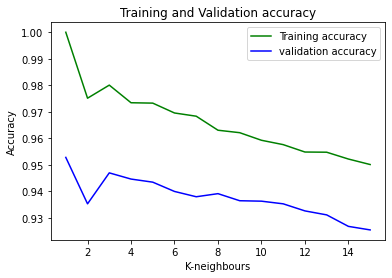

In [40]:
k = range(1,16)
plt.plot(k, Tr, 'g', label='Training accuracy')
plt.plot(k, Ts, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('K-neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.show()